# I INTRODUCTION

Nama  : Sebastian Daniel Parlindungan

Batch : RMT-23

Deskripsi : Program ini dibuat untuk melakukan analisis qualitas red wine untuk produk perusahaan penjual produk minuman beralkohol

# II Import Libraries

In [1]:
'''Library Import'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing lib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#modeling lib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Save mode
import joblib
import json

import time
import warnings
warnings.filterwarnings('ignore')

# IV DATA LOADING

In [2]:
'''load data csv'''
df = pd.DataFrame()
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# V. EDA

## Cek kolom numerik dan non-numerik

In [5]:
cat_cols = list(df.select_dtypes(include='object'))
cat_cols

[]

In [6]:
num_cols = df.columns[df.dtypes != 'object']
num_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

setelah dilakukan pemeriksaan kolom, ditemukan bahwa semua kolom bertipe numerik

## Cek Cardinality

In [7]:
for col in num_cols:
  print(f'cardinality kolom {col}:', df[col].nunique())
  print(df[col].value_counts(),'\n')

cardinality kolom fixed acidity: 96
fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64 

cardinality kolom volatile acidity: 143
volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64 

cardinality kolom citric acid: 80
citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64 

cardinality kolom residual sugar: 91
residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64 

cardinality kolom chlorides: 153
chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
   

cardinality di cek walau data numeric semua, sekalian mengecek jika ada data yang ordinal, dan ditemukan target(quality) merupakan ordinal

## cek duplikat

In [8]:
df.duplicated().sum()

240

setelah pemeriksaan duplikat, ditemukan 240 duplikat yang nantinya akan dihandle 

## Cek missing value

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

setelah pengecekan missing value, tidak ditemukan missing value.

## Pembagian Jenis feature pada Dataset

Berdasarkan data yang ada dalam dataset, feature yang bisa diambi ada 2 jenis :
- numeric column
- numeric ordinal column

In [10]:
#list column, mempermudah listing feature
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
numeric_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

data yang ada dalam feature yang ada di numeric_cols adalah data numerik yang tidak berurutan/berlevel, dan tidak membetuk kategori

In [12]:
numord_cols = ['quality']

data yang ada dalam feature yang ada di numord_cols adalah data numerik yang memiliki urutan atau tingkatan namun tidak membetuk kategori

In [13]:
print(df['quality'].unique())

[5 6 7 4 8 3]


bisa dilihat dari unique value di quality, nilai yang muncul adalah nilai kualitas dari red wine secara overall, konteks kualitas memiliki rating 0-10 dimana 0 qualitas sangat buruk dan 10 kualitas perferct

## Analisis Statistika

### Pendekatan Kuantitatif

Numerikal

In [14]:
df[num_cols].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Analisis Visual

## memeriksa outlier feature numeric_cols dengan box plot

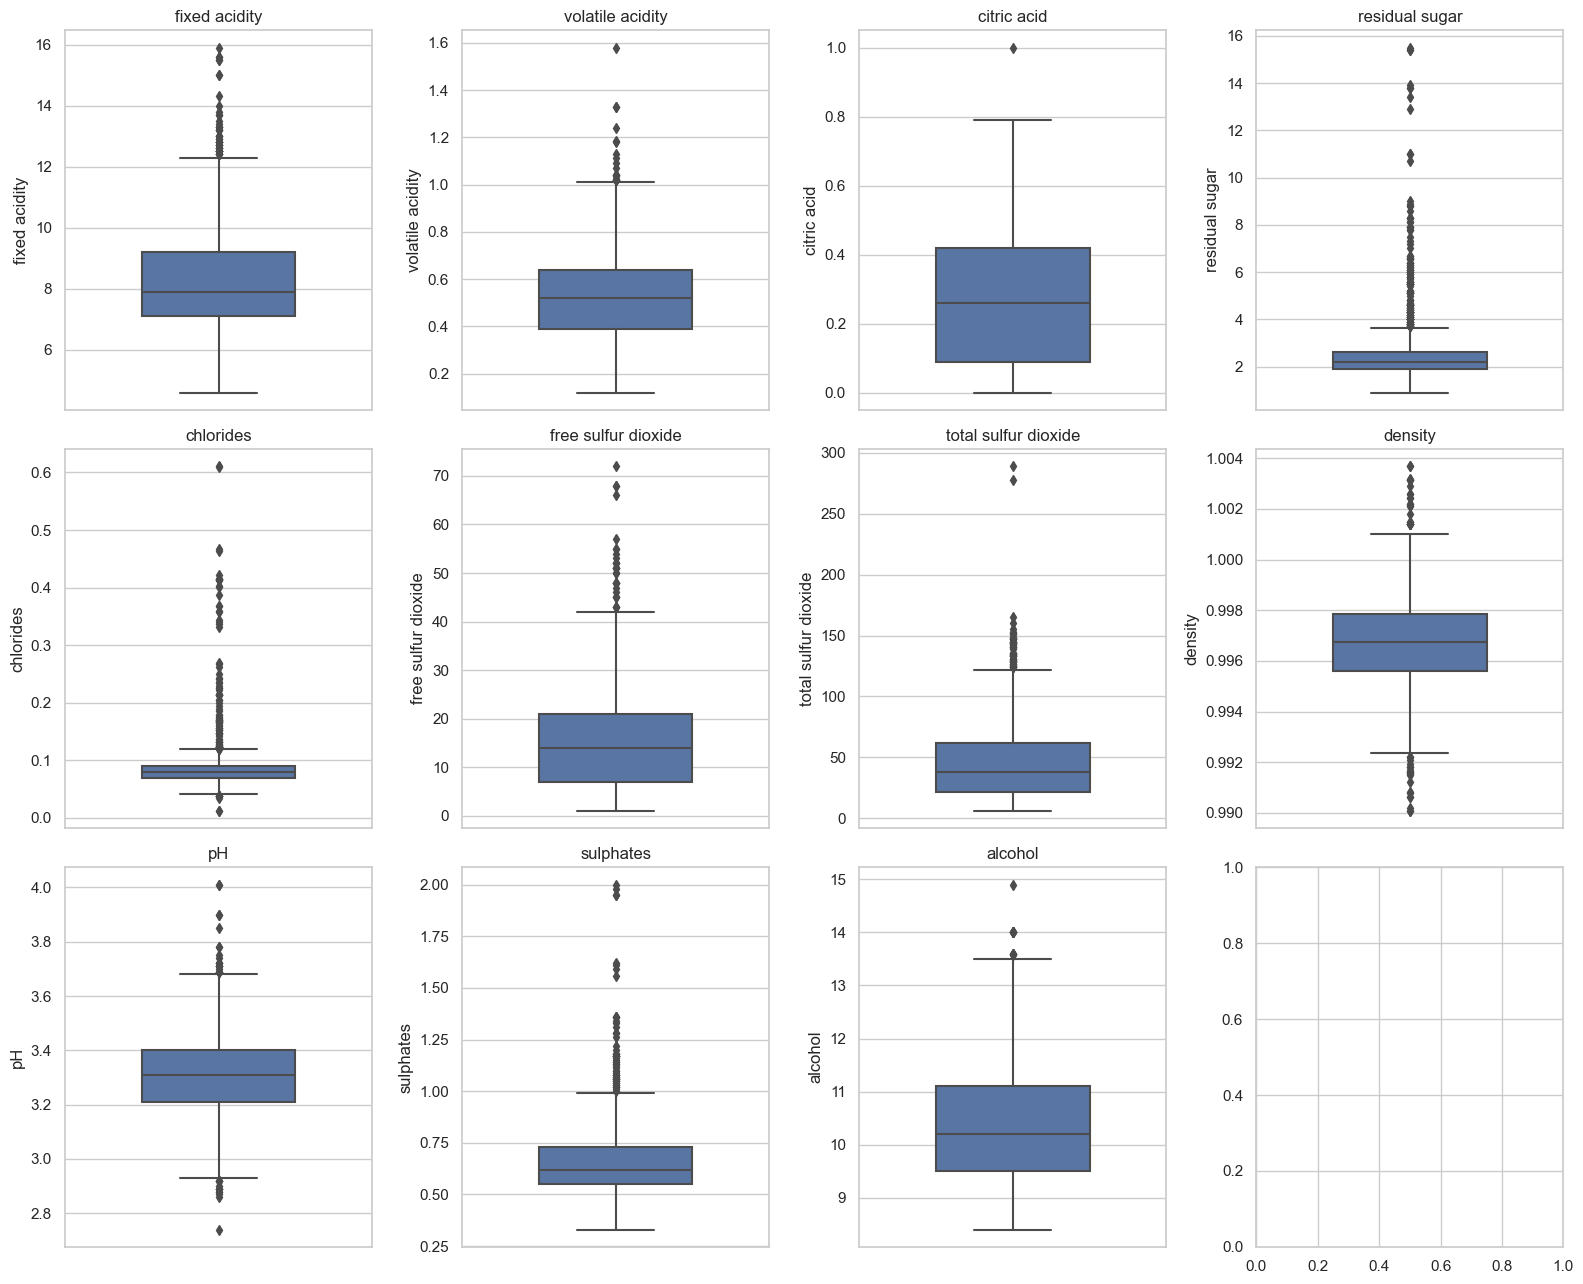

In [15]:
# Membuat style dari plot
sns.set(style="whitegrid")

# Mendefinisikan Jumlah baris dan kolom untuk menampilkan subplot
num_rows = 3 
num_cols = 4 

# Membuat objek figure dan axis untuk subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 13)) 

axes = axes.flatten()

# for loop untuk membuat boxplot untuk setiap feature di numeric_cols
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], width=0.5)  # Membuat box plot
    axes[i].set_title(col)
    axes[i].set_ylabel(col)

# Mengatur layout
plt.tight_layout()

# Menampilkan plots
plt.show()

In [16]:
# Menghitung IQR untuk setiap kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan threshold untuk outlier (biasanya threshold adalah 1.5 atau 2)
threshold = 1.5

# Menemukan indeks baris yang mengandung outlier dalam setiap kolom
outlier_indices = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)

# Menampilkan baris yang mengandung outlier
outlier_rows = df[outlier_indices]
print("Baris yang mengandung outlier:\n", outlier_rows)

Baris yang mengandung outlier:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9               7.5             0.500         0.36             6.1      0.071   
11              7.5             0.500         0.36             6.1      0.071   
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
...             ...               ...          ...             ...        ...   
1570            6.4             0.360         0.53             2.2      0.230   
1571            6.4             0.380         0.14             2.2      0.038   
1574            5.6             0.310         0.78            13.9      0.074   
1577            6.2             0.700         0.15             5.1      0.076   
1589            6.6             0.725         0.20             7.8      0.073

outliers akan dihandle nantinya  untuk mendukung performa model, karena sebelumnya saat outliers dibiarkan, hasil recall dari model dibawah 60% pada semua model yang dicoba, hasilnya tidak memuaskan maka outliers akan diolah.

<Axes: xlabel='quality', ylabel='count'>

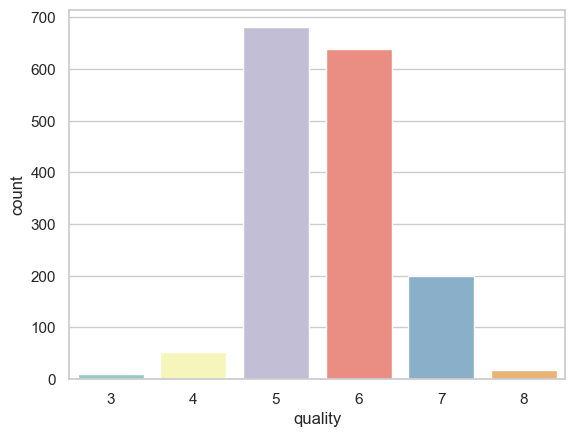

In [17]:
sns.countplot(data=df, x='quality', palette="Set3")

 plot ordinal diatas menunjukkan qualitas dari wine yang diperiksa. dari rate 0(paling jelek) - 10(perfect), dataset memiliki nilai kisaran 3-8, dan kebanyakan wine bernilai 5 yang berarti qualitasnya middle of the pack atau normal. untuk quality, agar membantu performa model, output dari quality nantinya akan dilah menjadi label good dan bad, dimana good adalah kisaran 5-10 dan bad di kisaran 0-4

## Data Preprocessing

### Handle Missing Value

dataset yang digunakan tidak memiliki missing value, sehingga tidak ada yang perlu di handle pada bagian ini

### Handle White-Space pada Feature Object

In [18]:
# List semua columns dengan tipe data object (string) 
object_columns = df.select_dtypes(include=['object']).columns

# Strip whitespace dari kolom string 
df[object_columns] = df[object_columns].apply(lambda x: x.str.strip())

white spce adalah space kosong di pinggir nama kolom, dilakukan pembersihan agar saat dipanggil tidak error

### Handle Outliers

In [19]:
def remove_outliers(df, column): # used 0.1 and 0.9
    Q1 = df[column].quantile(0.1)
    Q3 = df[column].quantile(0.9)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_out

In [20]:
for column in df.columns:
    df = remove_outliers(df, column)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1512 non-null   float64
 1   volatile acidity      1512 non-null   float64
 2   citric acid           1512 non-null   float64
 3   residual sugar        1512 non-null   float64
 4   chlorides             1512 non-null   float64
 5   free sulfur dioxide   1512 non-null   float64
 6   total sulfur dioxide  1512 non-null   float64
 7   density               1512 non-null   float64
 8   pH                    1512 non-null   float64
 9   sulphates             1512 non-null   float64
 10  alcohol               1512 non-null   float64
 11  quality               1512 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 153.6 KB


In [21]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### Handle duplikat

In [22]:
# Drop data duplikat
df = df.drop_duplicates()

# Reset index
df = df.reset_index(drop=True)

#Cek jumlah baris yang terduplikat
df.duplicated().sum()

0

### Mengubah data target 

In [23]:
bins = (0, 5.5, 10)
labels = ['bad', 'good']
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

In [24]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1277,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,good
1278,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1279,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1280,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad
1281,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,good


data diubah menjadi categorical good dan bad, dimana bad level quality 0-4 dan good level quality 5-10

In [25]:
df['quality'].value_counts()

quality
good    682
bad     600
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

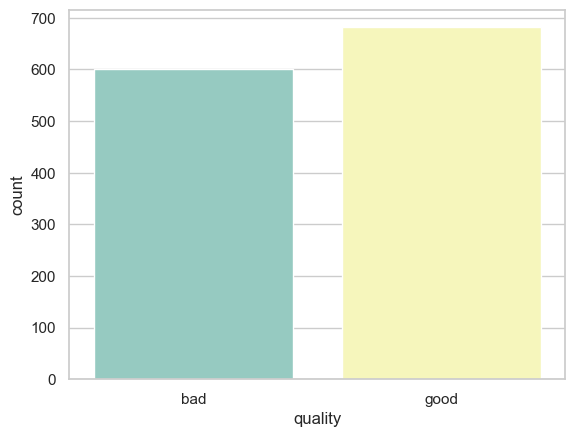

In [26]:
sns.countplot(data=df, x='quality', palette="Set3")

In [26]:
encoder_y = LabelEncoder()
df['quality'] = encoder_y.fit_transform(df['quality'])

# VI Feature Engineering

## Split Data

In [27]:
# split data jadi X(fitur) dan y(Target)
X = df.drop('quality', axis = 1)
y = df['quality']

## Pisahkan menjadi train-test  

In [28]:
X_train, X_test, y_train, y_test,= train_test_split(X,y, test_size = 0.3,
                                                    random_state = 420)

In [29]:
X.shape

(1282, 11)

In [30]:
len_X_train = len(X_train)
len_y_train = len(y_train)

print("Length of X_train:", len_X_train)
print("Length of y_train:", len_y_train)

Length of X_train: 897
Length of y_train: 897


In [31]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1045,9.7,0.69,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1
715,7.2,0.63,0.03,2.2,0.080,17.0,88.0,0.99745,3.53,0.58,9.8
420,9.3,0.40,0.49,2.5,0.085,38.0,142.0,0.99780,3.22,0.55,9.4
490,6.3,0.36,0.19,3.2,0.075,15.0,39.0,0.99560,3.56,0.52,12.7
740,6.6,0.61,0.01,1.9,0.080,8.0,25.0,0.99746,3.69,0.73,10.5


## EDA pada data train

### Scatter plot pada data

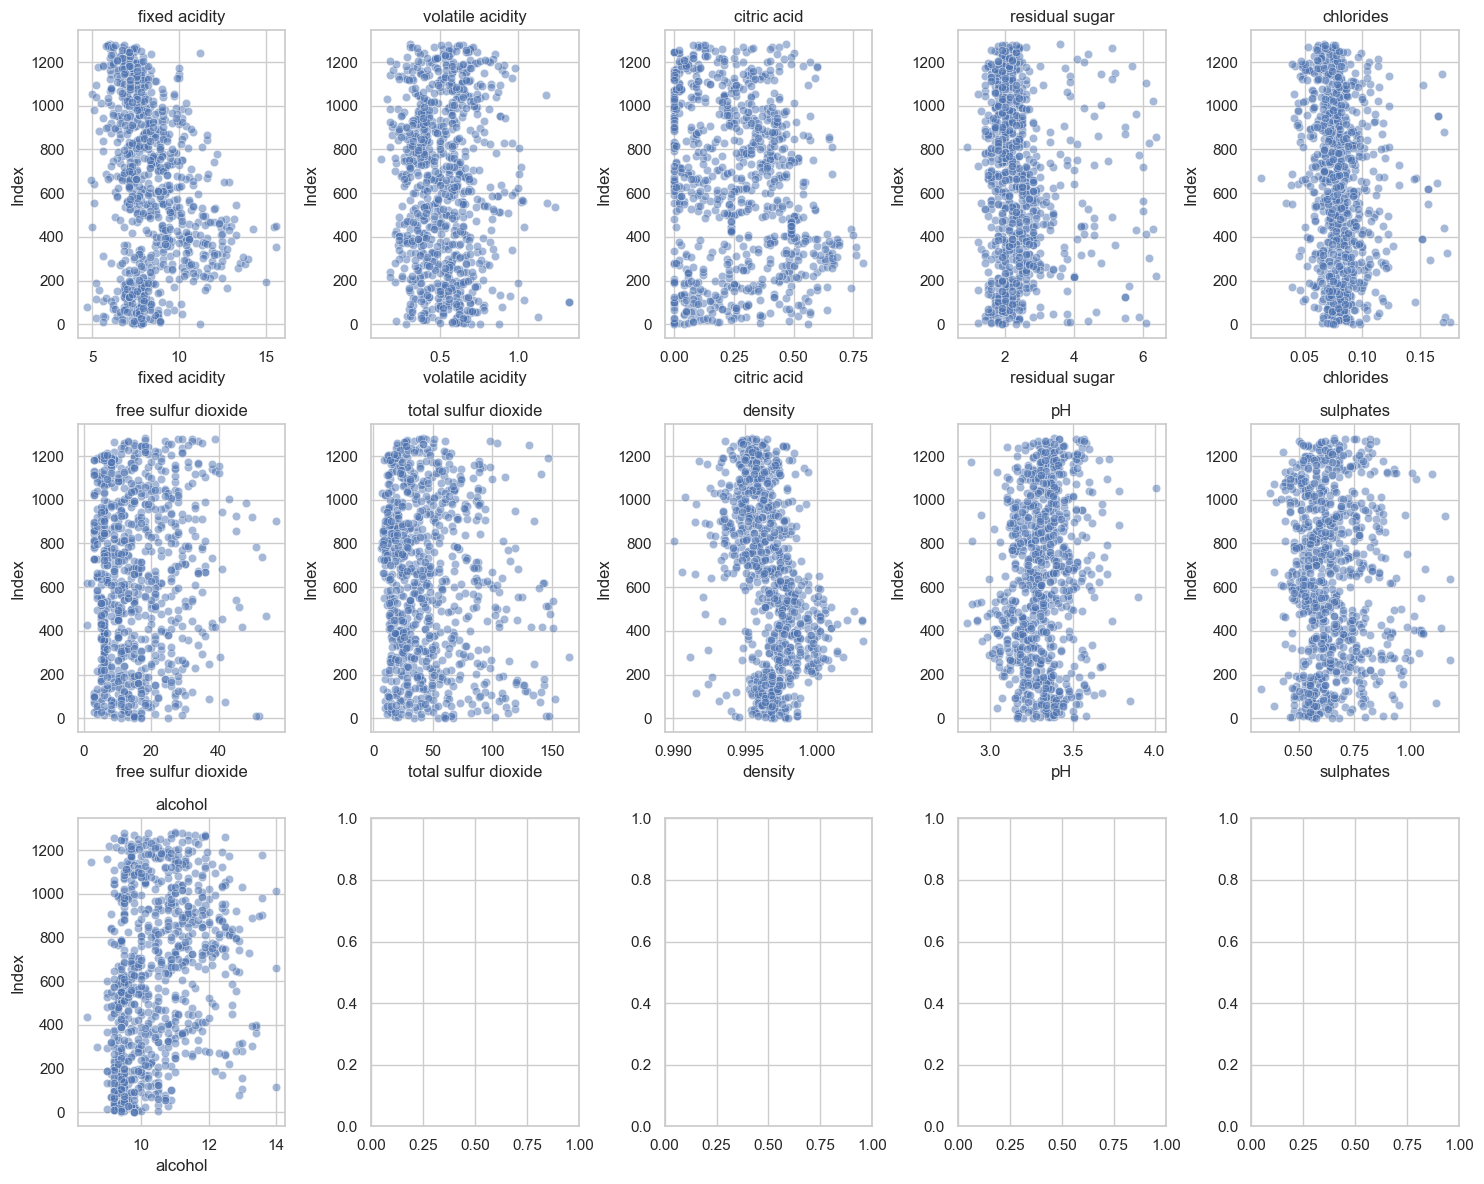

In [32]:
#Membuat style dari plot
sns.set(style="whitegrid")

#Mendefinisikan Jumlah baris dan kolom untuk menampilkan subplot
num_rows = 3 
num_cols = 5

#Membuat objek figure dan axis untuk subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))  # Adjust figsize as needed

#Flatten the axes array for easy iteration
axes = axes.flatten()

#iterasi seluruh num_ord_cols dan membuat bar plots untuk setiap Kolom
for i, col in enumerate(numeric_cols):
    sns.scatterplot(data=X_train, x=col, y=X_train.index, ax=axes[i], alpha=0.5)  # Create a scatter plot
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Index")

#Mengatur layout
plt.tight_layout()

#Menampilkan plot
plt.show()

karena data menyebar, maka akan di uji korelasi menggunakan spearman

### Uji Korelasi dengan Spearman

In [33]:
#Create a DataFrame to store the results
point_biserial_results = []

#Perform point-biserial correlation for each numerical feature against the target column
for col in numeric_cols:
    r, p_value = pointbiserialr(y_train, X_train[col])

#Append the results to the DataFrame
    point_biserial_results.append({'Feature': col, 'Point-Biserial Correlation': r, 'P-Value': p_value})

#Create a DataFrame from the results
point_biserial_df = pd.DataFrame(point_biserial_results)

#Print or visualize the point-biserial correlation results
print("Point-Biserial Correlation Results for Numerical Variables:")
print(point_biserial_df)


Point-Biserial Correlation Results for Numerical Variables:
                 Feature  Point-Biserial Correlation       P-Value
0          fixed acidity                    0.097669  3.410445e-03
1       volatile acidity                   -0.321672  4.859527e-23
2            citric acid                    0.178811  6.990714e-08
3         residual sugar                   -0.005413  8.713907e-01
4              chlorides                   -0.182754  3.540914e-08
5    free sulfur dioxide                   -0.072510  2.989351e-02
6   total sulfur dioxide                   -0.254670  9.575766e-15
7                density                   -0.171007  2.570251e-07
8                     pH                    0.009210  7.829685e-01
9              sulphates                    0.326082  1.149329e-23
10               alcohol                    0.467066  8.458853e-50


berdasarkan uji spearman memakai heatmap diatas dan memakai threshold 0.2, volatile acidity, citric acid, chlorides, sulphates, dan alcohol akan digunakan sebagai feature karena mereka melewati treshold

## Feature Selection

In [34]:
#memudahkan mengambil selected feature
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [35]:
# #Memilih fitur yang dipakai untuk model
# selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#        'pH', 'sulphates', 'alcohol']

In [36]:
#Drop fitur yang tidak dipakai untuk model
# X_train_selected = X_train[selected_features]
# X_test_selected = X_test[selected_features]

### Scalling

standard scaler digunakan karena outliers sudah dihandle saat data preprocessing, proses scaling akan dilakukan berbarengan dengan model definition menggunakan pipeline

In [37]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1045,9.7,0.69,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1
715,7.2,0.63,0.03,2.2,0.080,17.0,88.0,0.99745,3.53,0.58,9.8
420,9.3,0.40,0.49,2.5,0.085,38.0,142.0,0.99780,3.22,0.55,9.4
490,6.3,0.36,0.19,3.2,0.075,15.0,39.0,0.99560,3.56,0.52,12.7
740,6.6,0.61,0.01,1.9,0.080,8.0,25.0,0.99746,3.69,0.73,10.5


In [38]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
423,7.0,0.38,0.49,2.5,0.097,33.0,85.0,0.99620,3.39,0.77,11.4
1151,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8
255,10.3,0.59,0.42,2.8,0.090,35.0,73.0,0.99900,3.28,0.70,9.5
554,9.2,0.92,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,9.8
351,7.0,0.62,0.18,1.5,0.062,7.0,50.0,0.99510,3.08,0.60,9.3


# VII. Model definition & Training

In [45]:
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Classifier': RandomForestClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier()
}

# Loop through each model, train the model, and calculate performance
results = {}
for model_name, model in models.items():
    # Initialize an empty dictionary for each model
    results[model_name] = {}  
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Calculate performance using cross-validation (for example, 5-fold)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')

    # Save performance results
    results[model_name]['mean_recall'] = scores.mean()
    results[model_name]['std_recall'] = scores.std()

# Find the model with the highest recall
best_model = max(results, key=lambda k: results[k]['mean_recall'])

print("Evaluation Results on Training Data:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean recall: {metrics['mean_recall']:.4f}")
    print(f"  Std recall: {metrics['std_recall']:.4f}")

print(f"Best Model on Training Data: {best_model} with Mean Recall: {results[best_model]['mean_recall']:.4f}")

Evaluation Results on Training Data:
KNN:
  Mean recall: 0.7638
  Std recall: 0.0227
SVM:
  Mean recall: 0.7404
  Std recall: 0.0298
Decision Tree:
  Mean recall: 0.6936
  Std recall: 0.0264
Random Classifier:
  Mean recall: 0.7574
  Std recall: 0.0371
AdaBoost Classifier:
  Mean recall: 0.7447
  Std recall: 0.0350
Best Model on Training Data: KNN with Mean Recall: 0.7638


## Hyperparameter Tuning KNN (Best Result)

In [48]:
param_grid = {
    'model__n_neighbors': [3, 5, 7, 9],  # Test different values for n_neighbors
    'model__weights': ['uniform', 'distance'],  # Test different weight options
    'model__metric': ['euclidean', 'manhattan']  # Test different distance metrics
}

# Create a pipeline with StandardScaler and KNeighborsClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

# Instantiate GridSearchCV within the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Perform Grid Search on your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_score)

Best Hyperparameters: {'model__metric': 'euclidean', 'model__n_neighbors': 9, 'model__weights': 'distance'}
Best Accuracy: 0.7413718187461205


## Train Model With Best Param

In [54]:
# Best hyperparameters from GridSearchCV
best_params = {
    'metric': 'euclidean',
    'n_neighbors': 9,
    'weights': 'distance'
}

# Create a pipeline with StandardScaler and KNeighborsClassifier with best hyperparameters
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(**best_params))
])

# Train the pipeline with best hyperparameters on your data
best_pipeline.fit(X_train, y_train)

# Now you can use this best_pipeline to make predictions on new data
predictions = best_pipeline.predict(X_test)

In [57]:
# Generate and print a classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       173
           1       0.78      0.73      0.75       212

    accuracy                           0.74       385
   macro avg       0.74      0.74      0.74       385
weighted avg       0.74      0.74      0.74       385



# IX. Model Evaluation

In [59]:
#Model Prediction
y_prediction_train_best_model = best_pipeline.predict(X_train)
y_prediction_test_best_model =  best_pipeline.predict(X_test)

In [60]:
# Confusion Matrix - Train Set
cm_train = confusion_matrix(y_train, y_prediction_train_best_model)
print('Confusion Matrix : \n', cm_train)

Confusion Matrix : 
 [[427   0]
 [  0 470]]


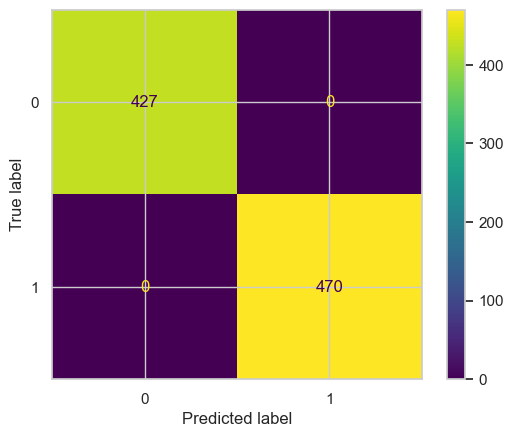

In [61]:
ConfusionMatrixDisplay(cm_train).plot()

In [62]:
# Model Evaluation - Train Set
print(classification_report(y_train, y_prediction_train_best_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       1.00      1.00      1.00       470

    accuracy                           1.00       897
   macro avg       1.00      1.00      1.00       897
weighted avg       1.00      1.00      1.00       897



In [63]:
# Confusion Matrix - Test Set
cm_test = confusion_matrix(y_test, y_prediction_test_best_model)
print('Confusion Matrix : \n', cm_test)

Confusion Matrix : 
 [[130  43]
 [ 58 154]]


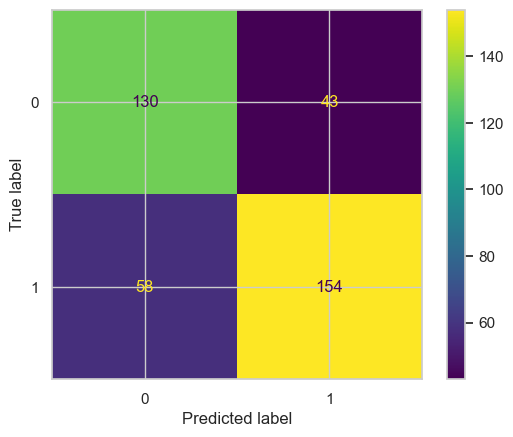

In [64]:
cm_test = confusion_matrix(y_test, y_prediction_test_best_model)
ConfusionMatrixDisplay(cm_test).plot()

In [65]:
# Model Evaluation - Test Set

print(classification_report(y_test, y_prediction_test_best_model))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       173
           1       0.78      0.73      0.75       212

    accuracy                           0.74       385
   macro avg       0.74      0.74      0.74       385
weighted avg       0.74      0.74      0.74       385



In [66]:
# Get Precision Score and Recall Score

print('Precision : ', precision_score(y_test, y_prediction_test_best_model))
print('Recall    : ', recall_score(y_test, y_prediction_test_best_model))

Precision :  0.7817258883248731
Recall    :  0.7264150943396226


# Perbandingan antara Tuned Model dan Untuned Model

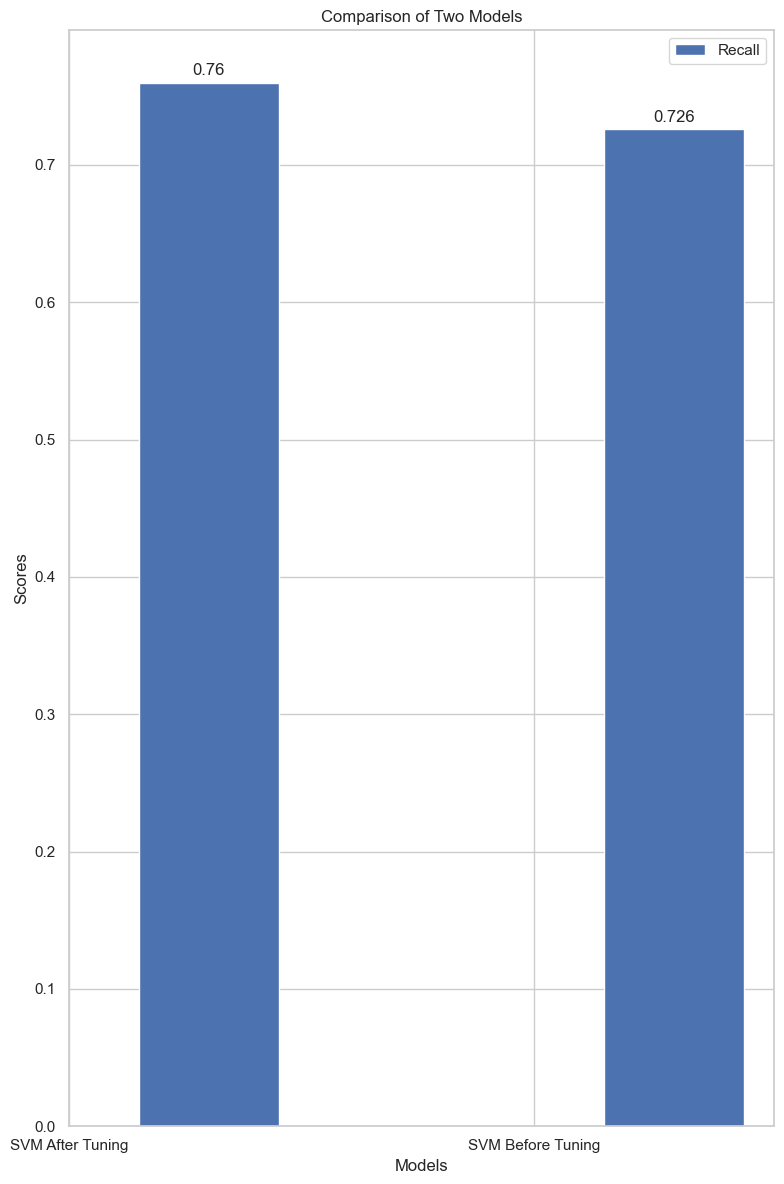

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Data contoh (ganti ini dengan data Anda)
model_names = ['KNN After Tuning', 'KNN Before Tuning']
recall_scores = [0.76, 0.726]

# Menyiapkan posisi untuk tiap model pada sumbu x
x = np.arange(len(model_names))

# Lebar batang dalam plot
width = 0.3

# Membuat plot
fig, ax = plt.subplots(figsize=(8, 12))
bar3 = ax.bar(x + width, recall_scores, width, label='Recall')

# Menambahkan label pada sumbu x dan y serta judul
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Two Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Menampilkan nilai pada tiap batang
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Jarak label dari batang
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar3)

plt.tight_layout()

# Menampilkan plot
plt.show()


# X Model Saving

In [68]:
with open('pipeline.pkl', 'wb') as file_1:
  joblib.dump(best_pipeline, file_1)

# XII Kesimpulan

Model ini menggunakan KNN sebagai algoritmanya dan standard Scaler sebagai scaler nya dan di dapatkan hasil recall train dan test sebesar 76.38%, recall menjadi parameter fokus yang digunakan karena ingin mencegah false positive dan false negative, qualitas wine yang harusnya bagus malah dinilai bad dan wine yang jelek dibilang good hal itu akan merugikan perusahaan, karena sebagai perusahaan yang membuat wine, menilai wine jelek menjadi bagus akan menurunkan reputasi perusahaan dan menilai wine bagus menjadi jelek yang artinya akan dijual murah, akan merugikan perusahaan walaupun menaikkan reputasi namun reputasi naik ke arah yang tidak diinginkan, tidak ada perusahaan wine yang ingin menjual wine high quality dengan harga murah.

bisnis insight dari model ini adalah perusahaan bisa lebih efektif memilah' qualitas wine. perusahaan mendapatkan revenue dari penjualan wine, ketika penilaian qualitas wine secara tepat dinilai good quality bisa dijual dengan harga tinggi, dengan model ini perusahaan bisa memaksimalkan produk wine yang keluar, memastikan produk merupakan qualitas yang benar' bagus dengan harga tinggi dan yang jelek bisa dijual harga murah.

tentunya model ini memiliki kelemahan, yaitu akurasi recall nya hanya 75% hal itu menyebabkan model yang diberikan masih jauh dari sempurna seperti masih ada kasus yang dianggap fatal yaitu false negative (wine bagus dibilang jelek (rugi bandar)). tetapi hal itu masih bisa di kembangkan lagi dengan beberapa poin:
    
Mencoba semua jenis scaling selain standard scaling
Handling Outlier lebih lagi untuk mendapatkan hasil yang bersih dari outlier
mencoba hyperparameter lain selain gridsearch
mendalami lagi tentang wine agar lebih mengerti dalam pengolahan datanya.

## Conceptual Problem

 1. Bagging (Bootstrap Aggregating), adalah teknik ensemble learning yang digunakan untuk meningkatkan kinerja dan akurasi prediksi model. Cara kerja bagging adalah mengambil sampel secara acak dari data pelatihan dan membuat beberapa versi acak dari dataset pelatihan, dataset acak ini digunakan untuk melatih model machine learning terpisah. setelah dilatih akan dibuat prediksi independen berdasarkan dataset acak yang digunakan untuk melatihnya. lalu akan dirata-ratanya untuk mendapatkan prediksi akhir 

 2. Random Forest (RF) dan AdaBoosting adalah dua teknik ensemble learning yang menggabungkan hasil dari beberapa model kecil untuk membuat prediksi yang lebih baik. perbedaan dari rf dan ada boosting adalah:
 - Pendekatan Bobot pada Data: AdaBoosting memberi bobot pada data yang sulit diprediksi, sementara RF tidak memberi bobot pada data.
 - Pemilihan Model: AdaBoosting untuk menangani data sulit, sementara RF menggunakan decision tree.
 - Independensi Model:RF bekerja secara independen, sementara model dalam AdaBoosting saling bergantung karena fokus pada data kompleks.

 3. Cross-validation adalah sebuah teknik yang digunakan dalam machine learning untuk mengevaluasi kinerja model secara objektif. Tujuan dari cross-validation adalah mengukur sejauh mana model yang telah dilatih untuk mengolah data baru .

